In [24]:
#Dependencies
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import gmaps
import os
from scipy.stats import linregress

In [6]:
#Import crime data
crime_file = pd.read_csv('Resources/crime_and_incarceration_by_state.csv')
crime_df = pd.DataFrame(crime_file)

'''
CRIME DATA COLUMN DESCRIPTION:
jurisdiction	State / federal jurisdiction
includes_jails	Indicates if prisoner totals include jails
prisoner_count	Year-end count of prisoners in custody
crime_reporting_change	Indicates whether state changed reporting systems affecting comparisons with previous years
crimes_estimated	Indicates if some crime totals are estimated
'''

#calculate 'total crimes' column
crime_df['Total Crime'] = crime_df['violent_crime_total'] + crime_df['property_crime_total']

#Reorganize columns and remove unnecessary columns
crime_df = crime_df[['jurisdiction','year','includes_jails','prisoner_count','crime_reporting_change','crimes_estimated','Total Crime']]

#rename columns
crime_df = crime_df.rename(columns = {'jurisdiction' : 'State',
                                      'year' : 'Year',
                                      'includes_jails' : 'Includes Jails' ,
                                      'prisoner_count' : 'Prisoner Count',
                                      'crime_reporting_change' : 'Crime Reporting Change',
                                      'crimes_estimated' : 'Crime Estimated'})
#proper state
crime_df['State'] = crime_df['State'].str.title()

crime_df.head()

,State,Year,Includes Jails,Prisoner Count,Crime Reporting Change,Crime Estimated,Total Crime
0,Federal,2001,False,149852,NaN,NaN,NaN
1,Alabama,2001,False,24741,False,False,192835.0
2,Alaska,2001,True,4570,False,False,26895.0
3,Arizona,2001,False,27710,False,False,322549.0
4,Arkansas,2001,False,11489,False,False,111296.0


In [20]:
#Import race/ethinicity data (census)
race_file = pd.read_csv('Resources/race_data.csv')
race_df = pd.DataFrame(race_file)
race_df.head()

,State,Year,Total Population,White (pop),Black (pop),Indigenous (pop),Asian (pop),Pacfic Islander (pop),Mixed Race (pop),Hispanic (pop),White (%),Black (%),Indigenous (%),Asian (%),Pacfic Islander (%),Mixed Race (%),Hispanic (%)
0,Alaska,2009,683142,467650,25161,91939,31878,4269,50632,39661,68.5,3.7,13.5,4.7,0.6,7.4,5.8
1,Alabama,2009,4633360,3256941,1209938,22969,46655,2025,56490,130220,70.3,26.1,0.5,1.0,0.0,1.2,2.8
2,Arkansas,2009,2838143,2228798,439355,19233,31120,2505,49997,153630,78.5,15.5,0.7,1.1,0.1,1.8,5.4
3,Arizona,2009,6324865,4906936,227282,284265,153301,11045,164255,1881878,77.6,3.6,4.5,2.4,0.2,2.6,29.8
4,California,2009,36308527,22258042,2249404,283031,4473292,132535,1272989,13102161,61.3,6.2,0.8,12.3,0.4,3.5,36.1


In [28]:
#Merge dataframes on state and year
crime_vs_race = pd.merge(crime_df,race_df, on=['State','Year'])
crime_vs_race.head()

,State,Year,Includes Jails,Prisoner Count,Crime Reporting Change,Crime Estimated,Total Crime,Total Population,White (pop),Black (pop),...,Pacfic Islander (pop),Mixed Race (pop),Hispanic (pop),White (%),Black (%),Indigenous (%),Asian (%),Pacfic Islander (%),Mixed Race (%),Hispanic (%)
0,Alabama,2009,False,27241,False,False,199201.0,4633360,3256941,1209938,...,2025,56490,130220,70.3,26.1,0.5,1.0,0.0,1.2,2.8
1,Alaska,2009,True,5472,False,False,24962.0,683142,467650,25161,...,4269,50632,39661,68.5,3.7,13.5,4.7,0.6,7.4,5.8
2,Arizona,2009,False,40544,False,False,264849.0,6324865,4906936,227282,...,11045,164255,1881878,77.6,3.6,4.5,2.4,0.2,2.6,29.8
3,Arkansas,2009,False,13338,False,False,123983.0,2838143,2228798,439355,...,2505,49997,153630,78.5,15.5,0.7,1.1,0.1,1.8,5.4
4,California,2009,False,168830,False,False,1184367.0,36308527,22258042,2249404,...,132535,1272989,13102161,61.3,6.2,0.8,12.3,0.4,3.5,36.1


In [41]:
#calculate percent imprisoned
crime_vs_race['Prisoner%'] = round(crime_vs_race['Prisoner Count']/crime_vs_race['Total Population'],3)*100
crime_vs_race.head()

# Census data includes PR and DC, crime data does not

,State,Year,Includes Jails,Prisoner Count,Crime Reporting Change,Crime Estimated,Total Crime,Total Population,White (pop),Black (pop),...,Hispanic (pop),White (%),Black (%),Indigenous (%),Asian (%),Pacfic Islander (%),Mixed Race (%),Hispanic (%),Prisoner,Prisoner%
0,Alabama,2009,False,27241,False,False,199201.0,4633360,3256941,1209938,...,130220,70.3,26.1,0.5,1.0,0.0,1.2,2.8,0.6,0.6
1,Alaska,2009,True,5472,False,False,24962.0,683142,467650,25161,...,39661,68.5,3.7,13.5,4.7,0.6,7.4,5.8,0.8,0.8
2,Arizona,2009,False,40544,False,False,264849.0,6324865,4906936,227282,...,1881878,77.6,3.6,4.5,2.4,0.2,2.6,29.8,0.6,0.6
3,Arkansas,2009,False,13338,False,False,123983.0,2838143,2228798,439355,...,153630,78.5,15.5,0.7,1.1,0.1,1.8,5.4,0.5,0.5
4,California,2009,False,168830,False,False,1184367.0,36308527,22258042,2249404,...,13102161,61.3,6.2,0.8,12.3,0.4,3.5,36.1,0.5,0.5


# Data Visuals

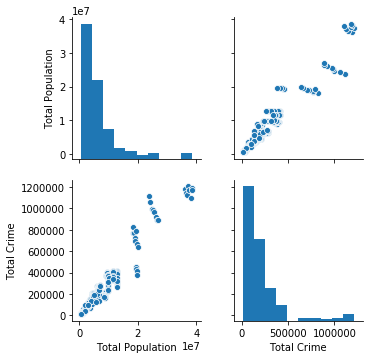

In [35]:
sns.pairplot(crime_vs_race[['Total Population','Total Crime']])

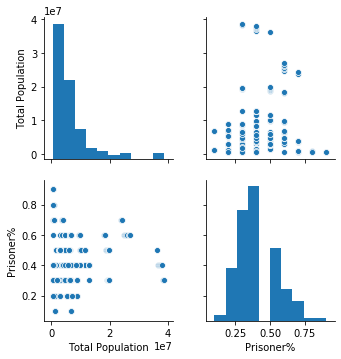

In [42]:
sns.pairplot(crime_vs_race[['Total Population','Prisoner%']])

In [ ]:
sns.pairplot(range(crime_vs_race.shape[20:])